<h3>Import Basic Libraries</h3>

In [ ]:
# Import basic libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Import libraries required for timeseries RNN LSTM neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [ ]:
# Import KERAS:TimeseriesGenerator
# This class produces time series batches used on training/testing the model

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Import KERAS:MinMaxScaler
# This class is used to preprocess (scale) the data

from sklearn.preprocessing import MinMaxScaler

<h3>Data Set: Walmart Inc. (WMT); Time Period:Jan 1, 2020 - Feb 28, 2022</h3>

In [ ]:
# Selecting the dataset
dataset_path = "D:\Downloads\WMT-01012020-02282022.csv"

In [ ]:
# Creating a dataframe called df_ALL

df_ALL = pd.read_csv(dataset_path)

In [ ]:
# Load the first five rows

df_ALL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,118.860001,119.889999,118.699997,118.940002,112.910896,6764900
1,2020-01-03,118.269997,118.790001,117.589996,117.889999,111.914124,5399200
2,2020-01-06,117.400002,118.089996,116.769997,117.650002,111.686272,6445500
3,2020-01-07,117.260002,117.519997,116.199997,116.559998,110.651520,6846900
4,2020-01-08,116.300003,116.730003,115.680000,116.160004,110.271812,5875800


<h3>Exploratory Data Analysis (EDA)</h3>

In [ ]:
# Count Variables and data points

df_ALL.shape

(544, 7)

In [ ]:
# Identify the data types of variables

df_ALL.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
# Summary Statistics

df_ALL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,135.860331,137.127904,134.696930,135.890827,131.337742,8.674467e+06
std,10.852610,10.583810,10.990895,10.721390,11.271173,4.401072e+06
min,105.199997,108.519997,102.000000,104.050003,98.775673,3.018200e+06
25%,129.649994,130.992501,128.537499,129.737500,124.379202,6.061100e+06
50%,139.409996,140.375000,138.370002,139.404999,135.346908,7.307650e+06
75%,143.697495,145.002502,142.742504,143.825004,139.334347,9.863500e+06
max,153.600006,153.660004,151.660004,152.789993,147.902008,3.967290e+07


In [ ]:
# Select only the Closing Price for analysis

df = df_ALL.iloc[:,4:5]

In [ ]:
df.head()

,Close
0,118.940002
1,117.889999
2,117.650002
3,116.559998
4,116.160004


<AxesSubplot:>

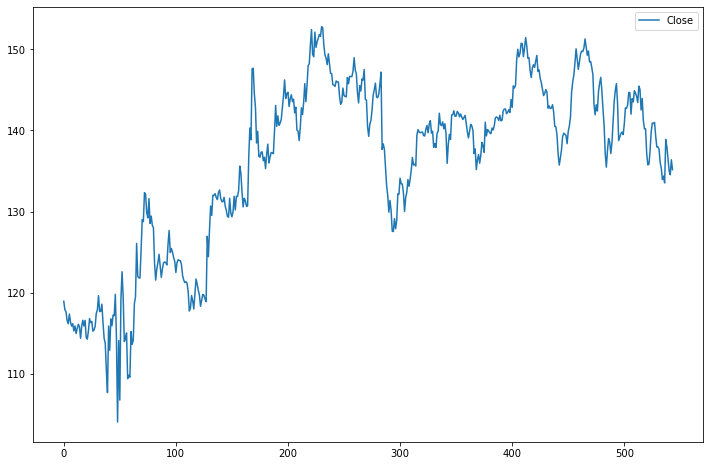

In [ ]:
# Plot Closing Price

df.plot(figsize=(12,8))

<h3>Length of Input Time Series - Number of Input Time Steps</h3>

In [ ]:
# Set the length of the input sequence
# Here we are using 40 consecutive closing prices to predict the next one

length40 = 40

In [ ]:
length40

40

<h3>Time Series Dataset: Train/Test Split</h3>

In [ ]:
len(df)

544

In [ ]:
# Set percentage of data used for testing, 20% reserved for testing

test_percent = 0.2

In [ ]:
# Number of data points reserved for testing the model

len(df)*test_percent

108.80000000000001

In [ ]:
# Round the test data points to the nearest decimal

test_length = np.round(len(df)*test_percent)
test_length

109.0

In [ ]:
# Index of the testing data

split_index = int(len(df)-test_length)
split_index

435

In [ ]:
# Training Dataset, 80% reserved for training data

data_train = df.iloc[: split_index]

# Testing Dataset
# All the indicies from (split_index - length40) to the end of the dataframe
# split_index - length40: Need the last 45 historical data points (belong to data_train) to predict the first data point of the data_test

data_test = df.iloc[split_index - length40 :]


In [ ]:
#Load training data first 5 rows
data_train.head()

,Close
0,118.940002
1,117.889999
2,117.650002
3,116.559998
4,116.160004


In [ ]:
#Load training data last 5 rows
data_train.tail()

,Close
430,145.029999
431,144.729996
432,142.740005
433,143.020004
434,142.690002


In [ ]:
#Load testing data first 5 rows
data_test.head()

,Close
395,142.059998
396,142.240005
397,142.550003
398,142.220001
399,143.820007


In [ ]:
#Load testing data last 5 rows
data_test.tail()

,Close
539,136.449997
540,135.050003
541,134.529999
542,136.380005
543,135.160004


<h3>Normalize Data (Scale it into the range [0, 1])</h3>

In [ ]:
# Create a MinMaxScaler to normalize the data

scaler = MinMaxScaler()

In [ ]:
# Train the scaler to perform the normalization (for training data only)

scaler.fit(data_train)

MinMaxScaler()

In [ ]:
# Normalize the training dataset

normalized_train = scaler.transform(data_train)

# Normalize the testing dataset

normalized_test = scaler.transform(data_test)

<h3>Create TimeseriesGenerator for Training</h3>

In [ ]:
# TimeseriesGenerator: Generate Time Series batches for training/testing
# Length is 45
# Batch size: Number of time series samples in each batch

batch_size22 = 22

# Creating a TimeseriesGenerator for Training

train_tsGenerator45 = TimeseriesGenerator(normalized_train, normalized_train, length=length40, batch_size=batch_size22)

In [ ]:
# Length of the normalized training dataset

len(normalized_train)

435

In [ ]:
len(train_tsGenerator45)

18

In [ ]:
# Check the first batch

X,y = train_tsGenerator45[0]

In [ ]:
print(X)

[[[0.30549861]
  [0.28395566]
  [0.27903163]
  [0.25666798]
  [0.24846129]
  [0.27308167]
  [0.2529749 ]
  [0.24271638]
  [0.24887155]
  [0.2304062 ]
  [0.24312682]
  [0.22384075]
  [0.23676642]
  [0.24723015]
  [0.24128021]
  [0.21173578]
  [0.24230612]
  [0.25748867]
  [0.24292159]
  [0.25707841]
  [0.21419773]
  [0.20968396]
  [0.23020099]
  [0.26179724]
  [0.25153873]
  [0.25441109]
  [0.22979071]
  [0.23286831]
  [0.24210089]
  [0.27472306]
  [0.28395566]
  [0.31965526]
  [0.2796471 ]
  [0.27985231]
  [0.29811247]
  [0.25174394]
  [0.21214604]
  [0.19963065]
  [0.13028314]
  [0.07447677]]

 [[0.28395566]
  [0.27903163]
  [0.25666798]
  [0.24846129]
  [0.27308167]
  [0.2529749 ]
  [0.24271638]
  [0.24887155]
  [0.2304062 ]
  [0.24312682]
  [0.22384075]
  [0.23676642]
  [0.24723015]
  [0.24128021]
  [0.21173578]
  [0.24230612]
  [0.25748867]
  [0.24292159]
  [0.25707841]
  [0.21419773]
  [0.20968396]
  [0.23020099]
  [0.26179724]
  [0.25153873]
  [0.25441109]
  [0.22979071]
  [0.232

In [ ]:
print (y)

[[0.24271638]
 [0.18178094]
 [0.26097654]
 [0.24353708]
 [0.2704145 ]
 [0.26897833]
 [0.32293806]
 [0.21296674]
 [0.        ]
 [0.20619608]
 [0.05560114]
 [0.31206406]
 [0.38018061]
 [0.31596219]
 [0.20352893]
 [0.20988917]
 [0.22527694]
 [0.10976611]
 [0.11838322]
 [0.11345917]
 [0.22855973]
 [0.19634801]]


<h3>Build, Train, and Test Model</h3></n></n><h3>Build LSTM Model</h3>

In [ ]:
# We are using only one feature, i.e., Close Price

n_features = 1

In [ ]:
# Define model

model = Sequential()

# Add an LSTM layer
# This layer has 50 LSTM cells
# Activation function: relu

model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(length40, n_features)))

# Dropout Layer

model.add(Dropout(0.2))

# Add 2nd LSTM layer

model.add(LSTM(units=50, activation='relu', return_sequences=True))

# Dropout Layer

model.add(Dropout(0.2))

# Add 3rd LSTM layer

model.add(LSTM(units=50, activation='relu'))

# Add a fully-connected layer for the final prediction

model.add(Dense(1))

<h3>Compile Model</h3>

In [ ]:
# Compile Model

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 40, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 40, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 40, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-traina

<h3>Train (fit) model using fit_generator()</h3>

In [ ]:
# Train the model

model.fit_generator(train_tsGenerator45, epochs=50)

Epoch 1/50


C:\Users\Phani\AppData\Local\Temp\ipykernel_9920\952923546.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_tsGenerator45, epochs=50)


18/18 [==============================] - 10s 69ms/step - loss: 0.2318
Epoch 2/50
18/18 [==============================] - 1s 69ms/step - loss: 0.0483
Epoch 3/50
18/18 [==============================] - 1s 69ms/step - loss: 0.0214
Epoch 4/50
18/18 [==============================] - 1s 70ms/step - loss: 0.0244
Epoch 5/50
18/18 [==============================] - 1s 72ms/step - loss: 0.0211
Epoch 6/50
18/18 [==============================] - 1s 74ms/step - loss: 0.0184
Epoch 7/50
18/18 [==============================] - 1s 74ms/step - loss: 0.0134
Epoch 8/50
18/18 [==============================] - 1s 73ms/step - loss: 0.0128
Epoch 9/50
18/18 [==============================] - 1s 69ms/step - loss: 0.0177
Epoch 10/50
18/18 [==============================] - 1s 70ms/step - loss: 0.0156
Epoch 11/50
18/18 [==============================] - 1s 70ms/step - loss: 0.0113
Epoch 12/50
18/18 [==============================] - 1s 69ms/step - loss: 0.0159
Epoch 13/50
18/18 [============================

<h3>Visualize Model's Performance after Training</h3>

In [ ]:
loss_history_keys = model.history.history.keys()
loss_history_keys

dict_keys(['loss'])

<AxesSubplot:>

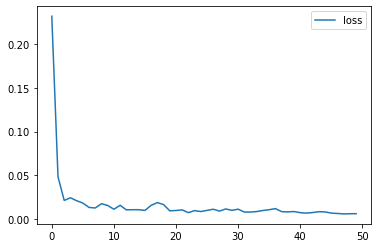

In [ ]:
# Load the loss data (model.history.history) into a data frame

ds_model_loss = pd.DataFrame(model.history.history)

# Visualize the loss data using DataFrame.plot()

ds_model_loss.plot()

<h3>Prediction for Testing: Using TimeseriesGenerator</h3></n></n><h5>Create TimeseriesGenerator for Testing</h5>

In [ ]:
# Batch Size is 1

batch_size1 = 1

# Create a TimeseriesGenerator for testing: test_tsGenerator

test_tsGenerator45 = TimeseriesGenerator(normalized_test, normalized_test, length=length40, batch_size=batch_size1)

<h5>Predict Future Data Points for Testing</h5>

In [ ]:
normalized_prediction = model.predict_generator(test_tsGenerator45)

C:\Users\Phani\AppData\Local\Temp\ipykernel_9920\26107903.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  normalized_prediction = model.predict_generator(test_tsGenerator45)


In [ ]:
# Prediction is a numpy 2D array with only one column

normalized_prediction

array([[0.83153504],
       [0.824819  ],
       [0.8196025 ],
       [0.8151456 ],
       [0.8094097 ],
       [0.80238014],
       [0.79349065],
       [0.7808712 ],
       [0.7641501 ],
       [0.7460477 ],
       [0.72963434],
       [0.71834195],
       [0.7130601 ],
       [0.7130915 ],
       [0.717035  ],
       [0.722317  ],
       [0.7291175 ],
       [0.7373304 ],
       [0.7471288 ],
       [0.7598172 ],
       [0.77529716],
       [0.792462  ],
       [0.81083137],
       [0.83012307],
       [0.8491092 ],
       [0.86580604],
       [0.879992  ],
       [0.8921236 ],
       [0.9024668 ],
       [0.91098905],
       [0.9180226 ],
       [0.9244632 ],
       [0.9295945 ],
       [0.9323787 ],
       [0.9332316 ],
       [0.93138003],
       [0.9275086 ],
       [0.921795  ],
       [0.914228  ],
       [0.9012979 ],
       [0.8827984 ],
       [0.862658  ],
       [0.84268945],
       [0.8272632 ],
       [0.8183195 ],
       [0.81616   ],
       [0.81809336],
       [0.820

In [ ]:
len(normalized_prediction)

109

In [ ]:
# Convert normalized predictions back to the true values

prediction = scaler.inverse_transform(normalized_prediction)

In [ ]:
# Flatten all the 2D array

prediction_index = np.arange(435, 544, step=1)
df_prediction = pd.DataFrame(data=prediction,index=prediction_index, columns=['Prediction'])

In [ ]:
df_prediction

,Prediction
435,144.579010
436,144.251678
437,143.997421
438,143.780197
439,143.500610
...,...
539,136.755356
540,136.760742
541,136.813461
542,136.826843


<h3>Visualize Prediction</h3>

<AxesSubplot:>

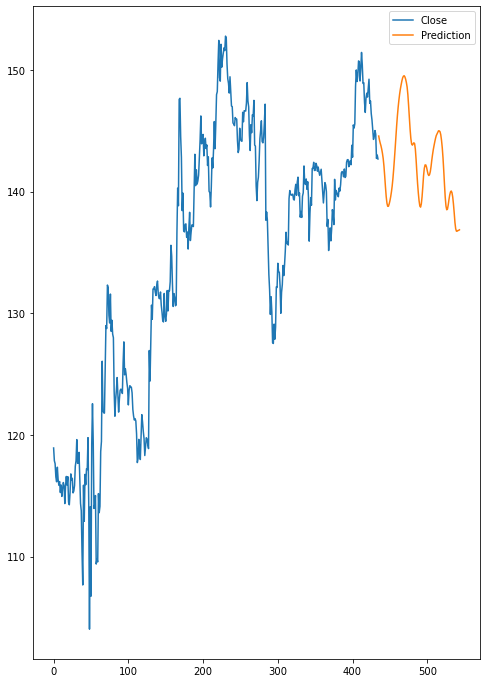

In [ ]:
ax = data_train.plot()
df_prediction.plot(ax=ax, figsize=(8, 12))

<h3>Visualize Prediction and Compare Actual Close Price</h3>

<AxesSubplot:>

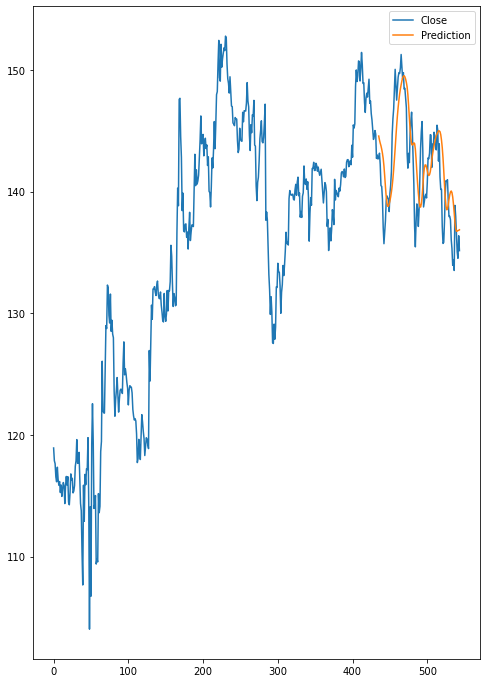

In [ ]:
ax = df.plot()
df_prediction.plot(ax=ax, figsize=(8, 12))

<h3>Time Series Forecasting with LSTM</h3></n></n><h5>Preprocess Full Input Dataset</h5>

In [ ]:
# Using MinMaxScaler to normalize the full dataset df

full_scaler = MinMaxScaler()
normalized_full_data = full_scaler.fit_transform(df)

<h3>Create TimeSeriesGenerator for Forecasting</h3>

In [ ]:
# Number of steps of the input timeseries

length40

40

In [ ]:
# Create Timeseries Generator for forecasting

forecast_tsGenerator = TimeseriesGenerator(normalized_full_data, normalized_full_data, length=length40, batch_size=batch_size22)

<h3>Build, Compile, and fit LSTM Model for Forecasting</h3>

In [ ]:
# Train/Fit LSTM Model

model.fit_generator(forecast_tsGenerator, epochs = 50)

Epoch 1/50


C:\Users\Phani\AppData\Local\Temp\ipykernel_9920\1146977592.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(forecast_tsGenerator, epochs = 50)


23/23 [==============================] - 2s 73ms/step - loss: 0.0061
Epoch 2/50
23/23 [==============================] - 2s 73ms/step - loss: 0.0064
Epoch 3/50
23/23 [==============================] - 1s 40ms/step - loss: 0.0065
Epoch 4/50
23/23 [==============================] - 1s 34ms/step - loss: 0.0052
Epoch 5/50
23/23 [==============================] - 1s 34ms/step - loss: 0.0054
Epoch 6/50
23/23 [==============================] - 1s 34ms/step - loss: 0.0053
Epoch 7/50
23/23 [==============================] - 1s 34ms/step - loss: 0.0049
Epoch 8/50
23/23 [==============================] - 1s 34ms/step - loss: 0.0051
Epoch 9/50
23/23 [==============================] - 1s 34ms/step - loss: 0.0048
Epoch 10/50
23/23 [==============================] - 1s 45ms/step - loss: 0.0050
Epoch 11/50
23/23 [==============================] - 2s 68ms/step - loss: 0.0045
Epoch 12/50
23/23 [==============================] - 2s 68ms/step - loss: 0.0048
Epoch 13/50
23/23 [=============================

<h3>Time Series Forecasting Using LSTM Neural Network </h3>

In [ ]:
forecast = []

# Set periods with the time span of forecasting
# Let's forecast for the next 30 business days (03/01/2022-04/11/2022)

periods = 30

first_eval_batch = normalized_full_data[-length40:]
current_batch = first_eval_batch.reshape((1, length40, n_features))

for i in range(periods):

    #get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])

    current_pred = model.predict(current_batch)[0]

    #store prediction

    forecast.append(current_pred)

    # update batch now include prediction and drop first value

    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 47ms/step


<h3>Inverse to Transform Normalized Data Back into True Values</h3>

In [ ]:
forecast = full_scaler.inverse_transform(forecast)
forecast

array([[135.92261479],
       [135.87256522],
       [135.96691221],
       [136.12210715],
       [136.29338489],
       [136.46067098],
       [136.61456151],
       [136.75118977],
       [136.86796436],
       [136.96492888],
       [137.04208041],
       [137.1022718 ],
       [137.14804793],
       [137.18009441],
       [137.20229832],
       [137.21914807],
       [137.23369696],
       [137.24974199],
       [137.26804431],
       [137.28966719],
       [137.31540664],
       [137.34476879],
       [137.37832013],
       [137.41607811],
       [137.45722055],
       [137.50066096],
       [137.54478117],
       [137.58815475],
       [137.63006416],
       [137.67201133]])

In [ ]:
df

,Close
0,118.940002
1,117.889999
2,117.650002
3,116.559998
4,116.160004
...,...
539,136.449997
540,135.050003
541,134.529999
542,136.380005


<h3>Creating new timestamp index with pandas</h3>

In [ ]:
# Calculate forecast index

forecast_index = np.arange(544, 574, step=1)

In [ ]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index, columns=['Forecast'])
forecast_df

,Forecast
544,135.922615
545,135.872565
546,135.966912
547,136.122107
548,136.293385
549,136.460671
550,136.614562
551,136.751190
552,136.867964
553,136.964929


<h3>Plot the Forecast</h3>

<AxesSubplot:>

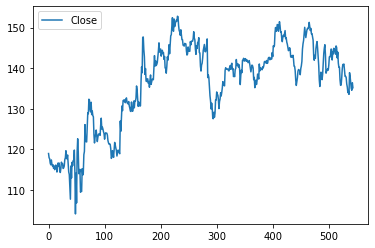

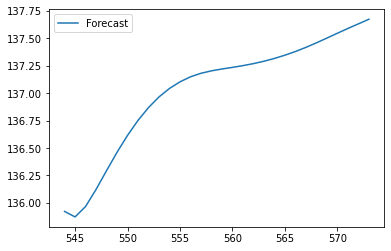

In [ ]:
df.plot()
forecast_df.plot()

<h3>Joining Pandas Plots</h3>

<AxesSubplot:>

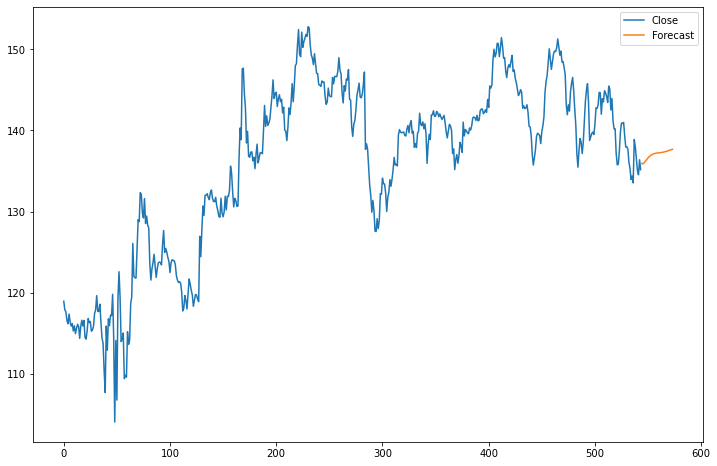

In [ ]:
ax = df.plot()
forecast_df.plot(ax=ax, figsize=(12, 8))

In [ ]:
# Selecting the dataset (actual close price)
dir_path_dataset_2 = 'D:\Downloads\WMT-03012020-04112022.csv'

In [ ]:
# Creating a dataframe called df_ALL_MAR_APR_2022
df_ALL_MAR_APR_2022 = pd.read_csv(dir_path_dataset_2)

In [ ]:
# Print the first 5 rows of the dataframe
df_ALL_MAR_APR_2022.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/1/2022,135.869995,137.889999,135.020004,135.990005,133.338913,8008300
1,3/2/2022,135.660004,136.830002,135.179993,136.160004,133.505585,7954600
2,3/3/2022,137.289993,140.470001,136.550003,139.289993,136.574570,9961700
3,3/4/2022,137.809998,142.940002,137.589996,142.820007,140.035751,11858800
4,3/7/2022,141.300003,143.630005,140.449997,141.669998,138.908173,15290000


In [ ]:
df_ALL_MAR_APR_2022 = df_ALL_MAR_APR_2022.iloc[:,4:5]
df_ALL_MAR_APR_2022

,Close
0,135.990005
1,136.160004
2,139.289993
3,142.820007
4,141.669998
5,138.740005
6,139.460007
7,142.630005
8,142.070007
9,144.050003


<AxesSubplot:>

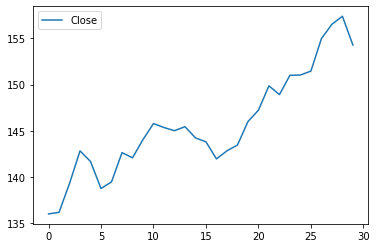

In [ ]:
# Plot stock close values
df_ALL_MAR_APR_2022.plot()

In [ ]:
forecast_df['Forecast'].values

array([135.92261479, 135.87256522, 135.96691221, 136.12210715,
       136.29338489, 136.46067098, 136.61456151, 136.75118977,
       136.86796436, 136.96492888, 137.04208041, 137.1022718 ,
       137.14804793, 137.18009441, 137.20229832, 137.21914807,
       137.23369696, 137.24974199, 137.26804431, 137.28966719,
       137.31540664, 137.34476879, 137.37832013, 137.41607811,
       137.45722055, 137.50066096, 137.54478117, 137.58815475,
       137.63006416, 137.67201133])

In [ ]:
df_ALL_MAR_APR_2022['Forecast'] = forecast_df['Forecast'].values
df_ALL_MAR_APR_2022

,Close,Forecast
0,135.990005,135.922615
1,136.160004,135.872565
2,139.289993,135.966912
3,142.820007,136.122107
4,141.669998,136.293385
5,138.740005,136.460671
6,139.460007,136.614562
7,142.630005,136.751190
8,142.070007,136.867964
9,144.050003,136.964929


<AxesSubplot:>

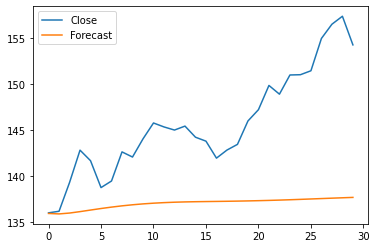

In [ ]:
# Plot Actual Close and Forecast
df_ALL_MAR_APR_2022.plot()

In [ ]:
vipin katakam